# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [60,142, 350]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8590,3045,7854,96,4095,225
1,37036,7152,8253,2995,20,3
2,3521,1099,1997,1796,173,995


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8590.000000,3045.000000,7854.000000,96.000000,4095.000000,225.000000
1,37036.000000,7152.000000,8253.000000,2995.000000,20.000000,3.000000
2,3521.000000,1099.000000,1997.000000,1796.000000,173.000000,995.000000
Mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455


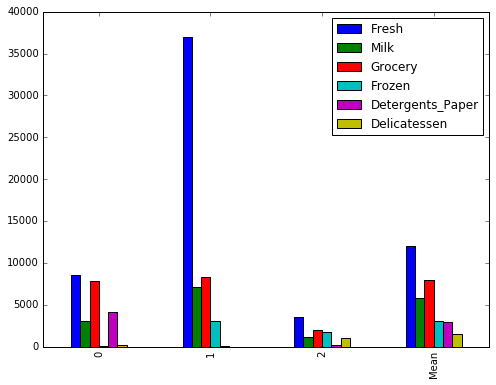

In [4]:
Mean = data.mean()                                   
Mean.name='Mean'
samples_mean =samples.append(Mean)                   
display(samples_mean)                                   
samples_mean.plot(kind= 'bar', figsize=(8,6))

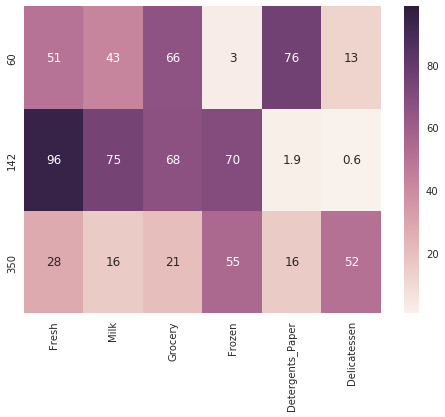

In [5]:
import seaborn as sns
# First, calculate the percentile ranks of the whole dataset.
percentiles = data.rank(pct=True)

# Then, round it up, and multiply by 100
percentiles = 100*np.round(percentiles, decimals=3)

# Select the indices you chose from the percentiles dataframe
percentiles = percentiles.iloc[indices]

# Now, create the heat map using the seaborn library
sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
Index 60(0): This customer spend around the median amount in Fresh, and close to median in Milk, amount close to mean in Grocery, and very less on Frozen(close to minimum), above 75% in Detergents_Paper and  less than 25% in Delicatessen. I think its more likely a super market.

Index 142(1): This customer is a very heavy consumer of Fresh, 75% consumer in Milk, 68 and 70 percentile on Grocery and Frozen respectively, very little spending( close to minimum)in Detergents_Paper and minimum in Delicatessen. Its more likely a food chain, focussed on fresh products.

Index 350(2): This customer doesn't spend much, with a maximum spending on Frozen(around median) followed by Delicatessen. Also consumes 28% on Fresh. It should be a Restaurant/Cafe.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [6]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Detergents_Paper'], axis=1)
target= data['Detergents_Paper']

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size = 0.25, random_state= 40)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state= 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# TODO: Report the score of the prediction using the testing set
#from sklearn.metrics import r2_score
score = regressor.score(X_test,y_test)
print 'Score:', score


Score: 0.787994241832


In [7]:
zip(new_data, regressor.feature_importances_)

[('Fresh', 0.021905149571747457),
 ('Milk', 0.038869417397320492),
 ('Grocery', 0.87146622206760915),
 ('Frozen', 0.044061495479595009),
 ('Delicatessen', 0.023697715483727753)]

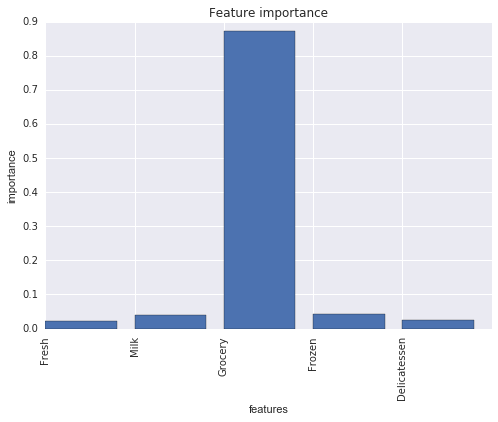

In [9]:
import matplotlib.pyplot as plt
index = np.arange(len(new_data.columns))
plt.bar(index, regressor.feature_importances_)
plt.xticks(index, new_data.columns, rotation='vertical')     
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Feature importance')
plt.show()


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
I attempted to predict the feature 'Detergent_Paper'. 
The reported prediction score was 0.787994241832.
No, this feature is not very important in identifying customesrs spending habits. It can be predicted based on the other features of the dataset. The R2 score is 0.79, which implies that the model is doing pretty good job in predicting 'Detergent_paper'based on other features."Detergents_Paper is correlated to other features in the dataset.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

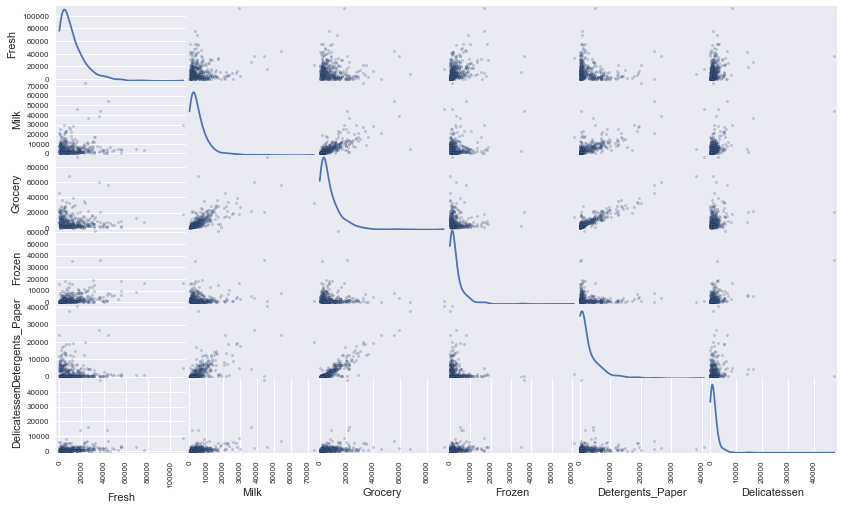

In [10]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

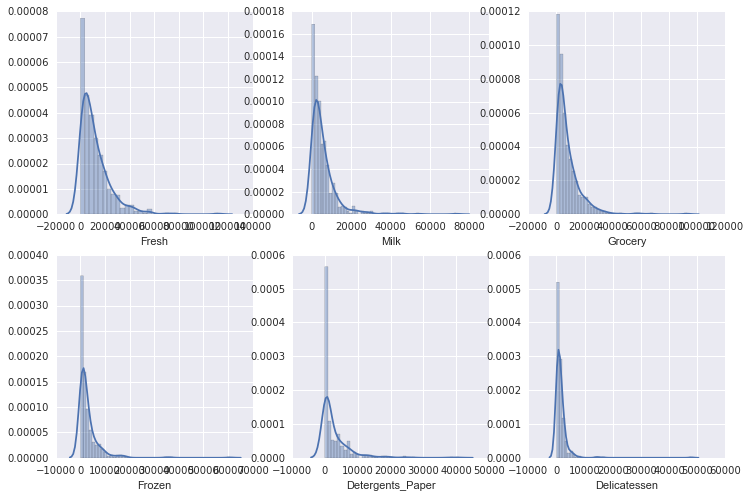

In [11]:
import matplotlib.pylab as plt
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
sns.distplot(data['Fresh']) 
plt.subplot(2,3,2)
sns.distplot(data['Milk']) 
plt.subplot(2,3,3)
sns.distplot(data['Grocery'])
plt.subplot(2,3,4)
sns.distplot(data['Frozen']) 
plt.subplot(2,3,5)
sns.distplot(data['Detergents_Paper']) 
plt.subplot(2,3,6)
sns.distplot(data['Delicatessen']) 

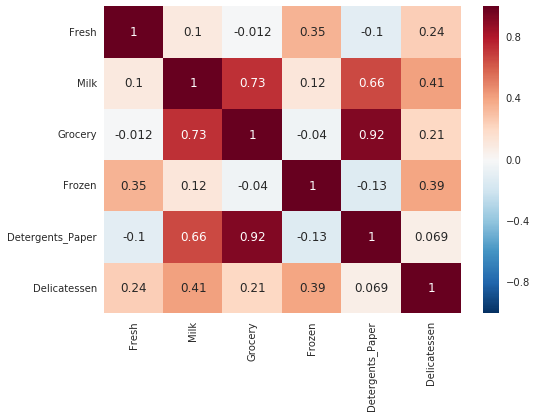

In [12]:
sns.heatmap(data.corr(), annot= True)

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
     Yes,
    The features 'Milk' and 'Grocery' has correlation cofficient of 0.73.
    
    The features 'Detergent_Paper' and 'Grocery has correlation cofficient of 0.92.
    
    The features 'Detergent_Paper' and 'Milk' has correlation cofficient of 0.66.
    
The feature 'Detergent_Paper', which we predicted earlier is highly positively correlated to features Milk and Grocery. So, adding this feature will not help much with the information gain, which confirms that this feature has a weak relevance. We should consider the distribution of the features too.

From the above visualization of features, we see that the distribution of features is not normal. Most of the features are right skewed.


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

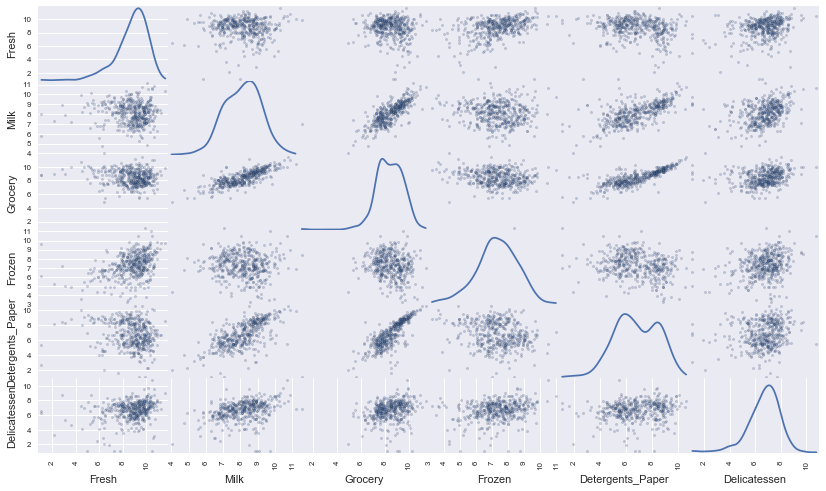

In [13]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [14]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.058354,8.021256,8.968778,4.564348,8.317522,5.416100
1,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
2,8.166500,7.002156,7.599401,7.493317,5.153292,6.902743


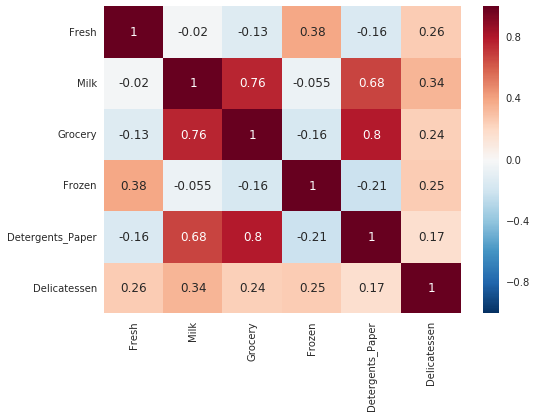

In [15]:
sns.heatmap(log_data.corr(), annot = True)

Correlation after feature scaling

The correlation between the features 'Milk' and 'Grocery' is stronger now.

The correlation between 'Detergent_Paper' and 'Grocery is much weaker now. 

The correlation between 'Detergent_Paper' and 'Milk' slightly stronger now.

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [16]:
outliers_all=[]
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
  
    
    # Display the outliers
    print 'step size {}'.format(step)
    print "Data points considered outliers for the feature '{}':".format(feature)
    FeatureOutliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(FeatureOutliers)
    outliers_all.extend(FeatureOutliers.index)

    
from collections import Counter   #Counter(outliers)= key&count
MultipleFeatureOutliers = [indice for indice, count in Counter(outliers_all).items() if count > 1]
print 'MultipleFeatureOutliers:', sorted(MultipleFeatureOutliers)

# OPTIONAL: Select the indices for data points you wish to remove
outliers=[]
outliers_potential= (set(outliers_all))

print '\n outliers_all:',sorted(outliers_potential)   # sorted(set) will sort the elements of set

good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
#good_data_withoutOutliers= log_data.drop(log_data.index[outliers_all]).reset_index(drop = True)

print '\n Data points in good_data:',len(good_data)
#print '\n Data points in good_data_withoutOutliers:',len(good_data_withoutOutliers)


step size 2.53350786861
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


step size 2.31824827282
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


step size 2.3988562138
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


step size 2.34932750101
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


step size 4.08935876094
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


step size 2.24228065442
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


MultipleFeatureOutliers: [65, 66, 75, 128, 154]

 outliers_all: [38, 57, 65, 66, 75, 81, 86, 95, 96, 98, 109, 128, 137, 142, 145, 154, 161, 171, 175, 183, 184, 187, 193, 203, 218, 233, 264, 285, 289, 304, 305, 325, 338, 343, 353, 355, 356, 357, 412, 420, 429, 439]

 Data points in good_data: 440


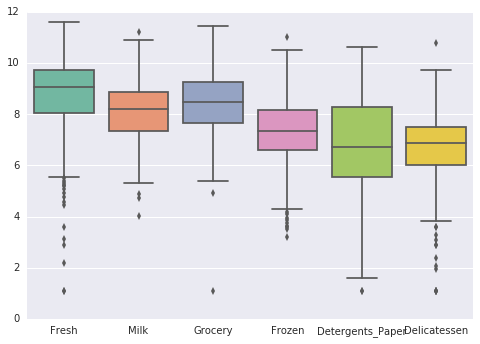

In [17]:
sns.boxplot(data=log_data, orient="v", palette="Set2")

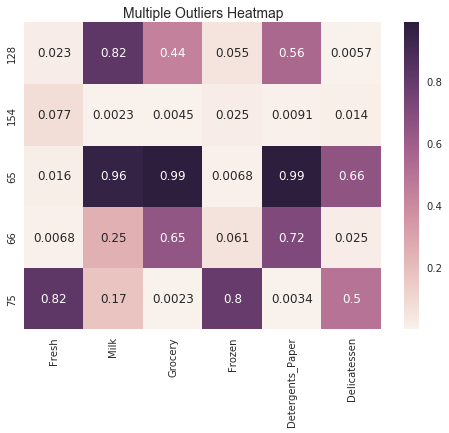

In [18]:
# Heatmap using percentiles to display outlier data
import matplotlib.pyplot as plt
import seaborn as sns
percentiles = data.rank(pct=True)
percentiles = percentiles.iloc[MultipleFeatureOutliers]
plt.title('Multiple Outliers Heatmap', fontsize=14)
heat = sns.heatmap(percentiles, annot=True)
display(heat)

In [19]:
data.iloc[[65, 66, 75, 128, 154]]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,85,20959,45828,36,24231,1423
66,9,1534,7417,175,3468,27
75,20398,1137,3,4407,3,975
128,140,8847,3823,142,1062,3
154,622,55,137,75,7,8


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
Yes, Data points with indices [65, 66, 75, 128, 154] has outliers for more than one features.

    Datapoint with index[65] has outliers for features Frozen and Fresh.
    Datapoint with index[66] has outliers for features Fresh and Delicatessen.
    Datapoint with index[75] has outliers for features Detergents_Paper and Grocery.
    Datapoint with index[128] has outliers for features Fresh and Delicatessen.
    Datapoint with index[154] has outliers for features Milk, Grocery and Delicatessen.
 
There are many data points added to the outliers list including the data points having outliers for more than one features. It will not be a good decision to remove these many outliers for this small dataset. But we may consider removing some of them, as they leads to the skewed distribution and will add no value to the predictive model.

As can be seen from the above heatmap and dataset for the data points with outliers for more than one features, some data points looks bit suspicious.
For example, data point[75] spends 3 units on Grocery and  3 units on Detergents_Paper but more than 20K on Fresh products.
But its possible that customer spends way more on one product but almost nothing on others. These data points still looks genuine to me and I think should not be removed. 

Following data points are identified as outliers based on Tukey's Method: [38, 57, 65, 66, 75, 81, 86, 95, 96, 98, 109, 128, 137, 142, 145, 154, 161, 171, 175, 183, 184, 187, 193, 203, 218, 233, 264, 285, 289, 304, 305, 325, 338, 343, 353, 355, 356, 357, 412, 420, 429, 439]

We can use good_data(including outliers) and good_data(without outliers) to compare the results.


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

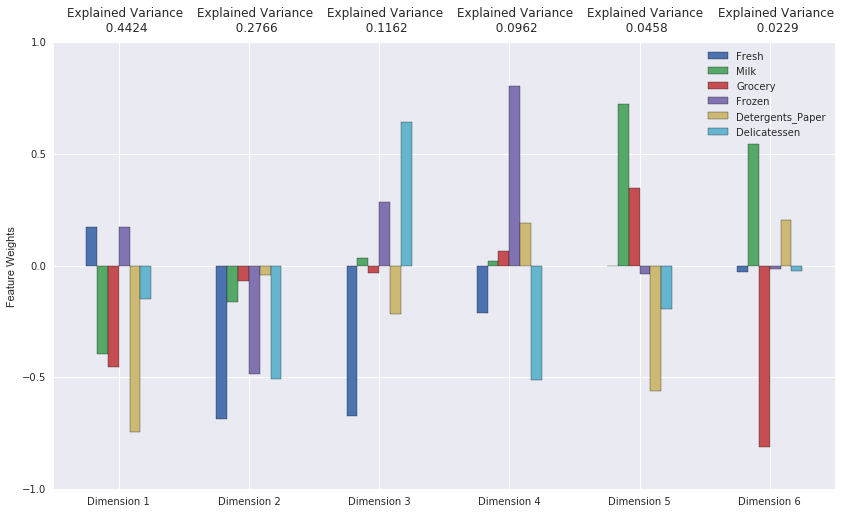

In [20]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca= PCA(n_components= 6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

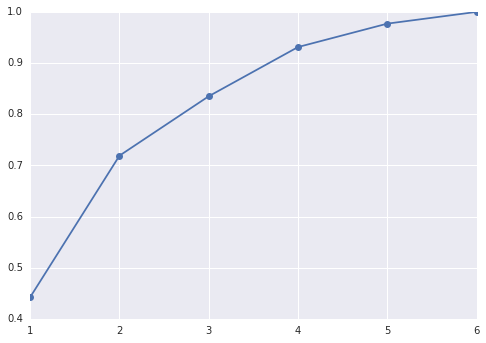

In [21]:
x = np.arange(1, 7)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o')

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**
     The first two principal components has total explained variance of 0.7190 (0.4424 + 0.2766).
    
     The first four components has total explained variance of 0.9314.

Dimension 1:  About 44% of total variance is explained by this dimension. There is high value of weights on Detergents_Paper, Milk, Grocery. It represents customer spending on retail goods.

Dimension 2: The next 28% of total variance is explained by the orthogonal axis, where more weight is placed on Fresh, Frozen and Delicatessen products. It represents customer spending in food(restaurants).

Dimension 3: The next 12% of total variance is explained, where Fresh and Detergents_Paper is on one side and Frozen and Deli products on other side. Customer spending on Fresh and Detergents_paper could represent Restaurants, while those spending on Deli and Frozen could represent Cafe.  

Dimension 4: The next 10% of the total explained variance is explained by this dimension where, Frozen and Detergent is on one side and Fresh and Deli on other side.
    


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [22]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.5699,1.6623,-2.1600,-1.3119,-0.4088,-0.1069
1,3.5297,1.2649,-3.7593,2.3727,3.9425,-0.7651
2,1.9406,0.4803,0.9341,-0.2318,-0.2337,-0.2453


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [23]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components= 2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [24]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.5699,1.6623
1,3.5297,1.2649
2,1.9406,0.4803


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

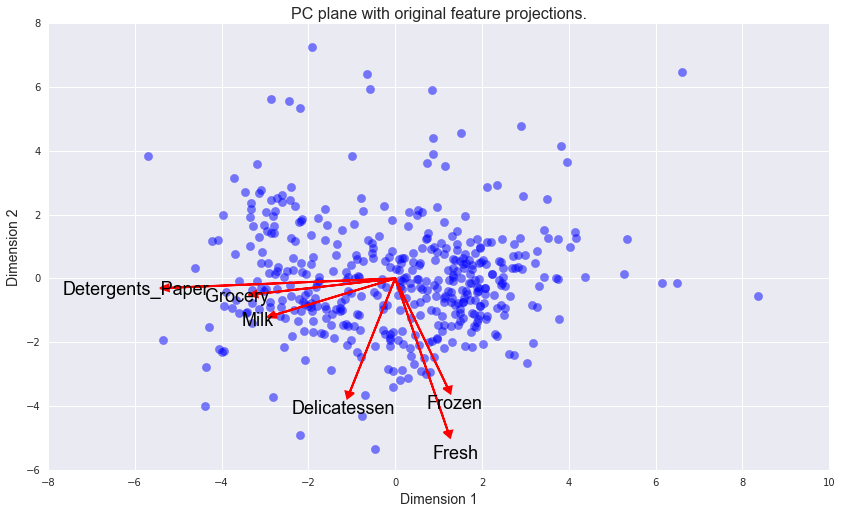

In [25]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

'Milk', 'Grocery' and 'Detergents_Paper' are strongly correlated to first component.
'Delicatessen', 'Frozen' and 'Fresh' are strongly correlated to the second component.
Yes, it agrees with the pca_results plot.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** 
  Advantages of K-Means:
 
    1.Fast and robust 
    2.Better for high dimensional data.
    3.Easy to interpret and Implement.

Advantages of Gaussian Mixture Model:

    1. It performs soft clustering(incorporates a degree of uncertainty that sample belongs to each cluster)
    2. Does not assume clusters to be of any geometry. Works well with non-linear geometric distributions as well.
    3. It is fast and agnostic algorithm.
    
GM takes variance into consideration when it calculates the distance and can adjust itself to elliptic shape cluster. Kmeans calculate distance, while GM calculates “weighted” distance.

Based on the nature of the dataset, I would use KMeans Clustering, as it works well with high dimensional data and is computationally faster. It is easy to interpret the clusters.


http://scikit-learn.org/0.17/modules/mixture.html#gmm-classifier
 
   

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [26]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans
n_clusters=[2,3,4,5,6]
for cluster in n_clusters:
    kmeans= KMeans(cluster)
    clusterer = kmeans.fit(reduced_data)

# TODO: Predict the cluster for each data point
    preds = kmeans.predict(reduced_data)

# TODO: Find the cluster centers
    centers = kmeans.cluster_centers_
    
# TODO: Predict the cluster for each transformed sample data point
    sample_preds = kmeans.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    from sklearn.metrics import silhouette_score
    score = silhouette_score(reduced_data, preds)
    print "silhouette score for cluster '{}':".format(cluster)
    print score 

silhouette score for cluster '2':
0.419710620309
silhouette score for cluster '3':
0.393021108188
silhouette score for cluster '4':
0.330321550765
silhouette score for cluster '5':
0.350054902109
silhouette score for cluster '6':
0.358349297118


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
    
    silhouette score for cluster '2': 0.418
    
    silhouette score for cluster '3': 0.393
    
    silhouette score for cluster '4': 0.330
    
    silhouette score for cluster '5': 0.350
    
    silhouette score for cluster '6': 0.358
  
  cluster 2 has the best silhouette score.       

In [29]:
kmeans= KMeans(n_clusters= 2)
clusterer = kmeans.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = kmeans.predict(reduced_data)

# TODO: Find the cluster centers
centers = kmeans.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = kmeans.predict(pca_samples)
print sample_preds
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    
score = silhouette_score(reduced_data, preds)
print score 

[0 1 1]
0.419166083203


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

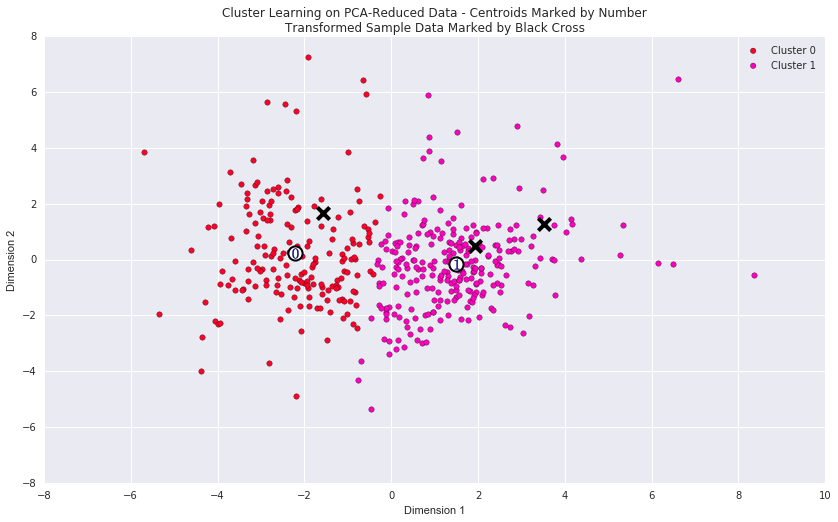

In [30]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [31]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers =np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

centers_mean= pd.DataFrame.mean(data)
centers_mean.name= 'centers_mean'
centers_median = pd.DataFrame.median(data)
centers_median.name= 'centers_median'
true_centers_mean=true_centers.append(centers_mean)
true_centers_mean_median=true_centers_mean.append(centers_median)

print '\n true_centers_mean_median:\n',true_centers_mean_median


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3570.0,7749.0,12463.0,900.0,4567.0,966.0
Segment 1,8994.0,1909.0,2366.0,2081.0,290.0,681.0



 true_centers_mean_median:
                       Fresh         Milk       Grocery       Frozen  \
Segment 0        3570.000000  7749.000000  12463.000000   900.000000   
Segment 1        8994.000000  1909.000000   2366.000000  2081.000000   
centers_mean    12000.297727  5796.265909   7951.277273  3071.931818   
centers_median   8504.000000  3627.000000   4755.500000  1526.000000   

                Detergents_Paper  Delicatessen  
Segment 0            4567.000000    966.000000  
Segment 1             290.000000    681.000000  
centers_mean         2881.493182   1524.870455  
centers_median        816.500000    965.500000  


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

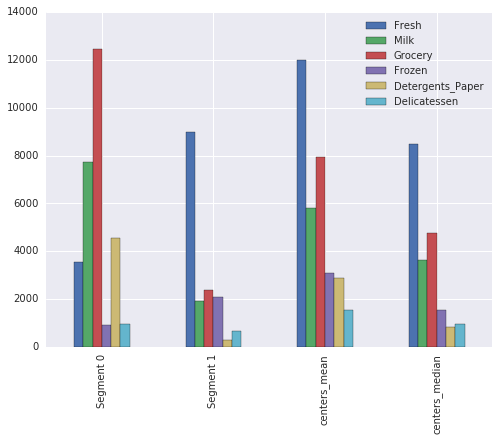

In [32]:
true_centers_mean_median.plot(kind= 'bar', figsize=(8,6))

**Answer:**
Based on the above visualization of two segments and comparative study with mean and median spendings, we see that the customers in Segment 0 spends more than both mean and median on Milk, Grocery, Detergents_Paper. And spends more than median in Delicatessen. It could represent Retailer.

The customers in Segment 1 spends more than median in Fresh and Frozen. While the spending on other features is less than both median and mean spendings. It could be a Restaurant/Cafe


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8590,3045,7854,96,4095,225
1,37036,7152,8253,2995,20,3
2,3521,1099,1997,1796,173,995


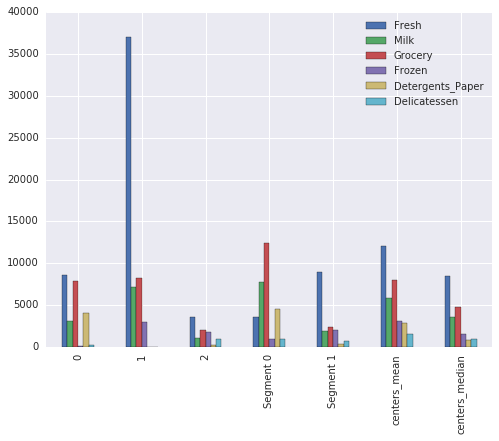

In [33]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    
display(samples)
samples_centers_mean_median= samples.append(true_centers_mean_median)
samples_centers_mean_median.plot(kind= 'bar', figsize=(8,6))

**Answer:**
Sample point[0] has more spendings on Grocery, Detergents_Paper and less on Fresh, Frozen. It mimics cluster 0.

Sample point[1] has more spendings on Fresh, Frozen and less on others. It mimics cluster 1.

Sample point[2] comparatively spends maximum on Frozen and Delicatessen. It mimics cluster 1

Pridictions on each sample point is consistent with our earlier assumptions.


In [34]:
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    print 'The distance between sample point {} and center of cluster {}:'.format(i, pred)
    print (samples.iloc[i] - true_centers.iloc[pred])

Sample point 0 predicted to be in Cluster 0
The distance between sample point 0 and center of cluster 0:
Fresh               5020.0
Milk               -4704.0
Grocery            -4609.0
Frozen              -804.0
Detergents_Paper    -472.0
Delicatessen        -741.0
dtype: float64
Sample point 1 predicted to be in Cluster 1
The distance between sample point 1 and center of cluster 1:
Fresh               28042.0
Milk                 5243.0
Grocery              5887.0
Frozen                914.0
Detergents_Paper     -270.0
Delicatessen         -678.0
dtype: float64
Sample point 2 predicted to be in Cluster 1
The distance between sample point 2 and center of cluster 1:
Fresh              -5473.0
Milk                -810.0
Grocery             -369.0
Frozen              -285.0
Detergents_Paper    -117.0
Delicatessen         314.0
dtype: float64


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
I think the change would not affect all customers equally. As the nature of spendings in two different segments vary based on the products they consume.

1.Cluster/Segment 0 represents Retailers- This segment could be flexible as it stocks wide variety of perishable
  and non perishable products.
2.Cluster/Segment 1 represents Restaurants/Cafe- This segment consumes more Fresh products and serves fresh 
   food, so I assume would not react positively to the change in delivery service. They would prefer frequent 
   delivery in order to keep their food as fresh as possible

Company can run A/B test on the sample of customers from each segment. They could then evaluate the feedbacks of the customers seperately to get the quantitative score of the customer's satisfaction. After this the wholesale distributor can look at the p values for the tests that the null hypothesis (the difference between the chosen metric between the control group and the experiment is zero). If the p value for segment 0 A/B test is smaller, it means segment 0 customers are affected more by the change.

Then the result could be generalized. Particular pattern or trend should also be considered to make targetted decisions on each cluster.


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
Data is already classified into two clusters and each customer has a customer segment/cluster. Cluster(0)represents Retailers and cluster(1) represents Restaurants/Cafe. So we can use Supervised learning technique like Random Forest to train our model on the existing data. The customer segments for each customer we identified using KMeans clustering would be the target variable. This trained model can be used to predict clusters for the new customers. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

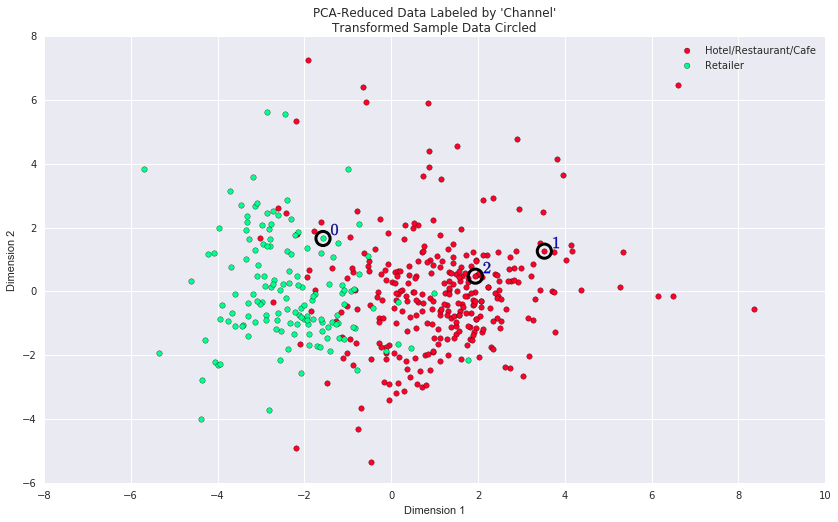

In [35]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
From the above visualization, we could see the two clusters but there is some overlap between the cluster sets, hence clusters are not classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution except at extreme right and extreme left. I used KMean clustering with 2 clusters that appears to fit better than this one with Channel feature.

This classification is consistent with the previous definition of customer segments.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.